## What is RQA?

- A method to quantify underlying **patterns** in the **data**.
    - **data**: time-series data; climate chagnes, music, dynamical system etc.
    - **patterns**: repetitions.

## How to quantify the patterns?

- Simply put, calculate pair-wise distances between data points or vectors and put them into a matrix.
- Plot the matrix and observe carefully!
- Finally, make indeces to quantify the repeating patterns (ref: [Marwan et al., 2007](http://www.sciencedirect.com/science/article/pii/S0370157306004066)).
    - e.g., How long/short are the vertical/diagonal lines?
    - e.g., How much are the patterns complex?
    
## Let's play with a simple speech example
- Data: two sound files with a recording of a word 'rice' in a normal and a fast rate (both sampled at 44,100 Hz; Haskins IEEE rate dataset).
    - 'rice_normal.wav'
    - 'rice_fast.wav'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
from scipy.spatial.distance import pdist, squareform

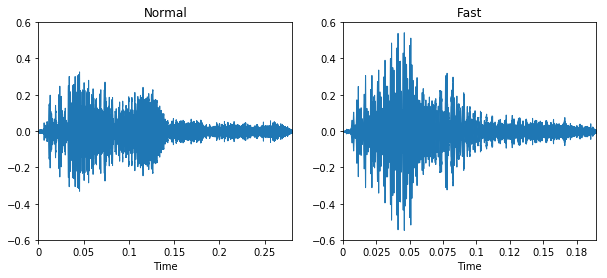

In [3]:
normal = 'rice_normal.wav'
fast = 'rice_fast.wav'
yn, srn = librosa.load(normal)
yf, srf = librosa.load(fast)
plt.figure(figsize=(10,4), facecolor='white')
ax1 = plt.subplot(1,2,1)
plt.title('Normal')
librosa.display.waveplot(yn, sr=srn)
ax2 = plt.subplot(1,2,2, sharey=ax1)
plt.title('Fast')
librosa.display.waveplot(yf, sr=srf)

In [4]:
def get_recurrence_matrix(data, e=0.01, coding=1):
    pd = pdist(data, 'euclidean')
    pd[pd > e] = coding
    return squareform(pd)

In [5]:
yn = yn.reshape((-1,1)) # make a column vector
yf = yf.reshape((-1,1)) # make a column vector

rec_mat_n = get_recurrence_matrix(yn)
rec_mat_f = get_recurrence_matrix(yf)

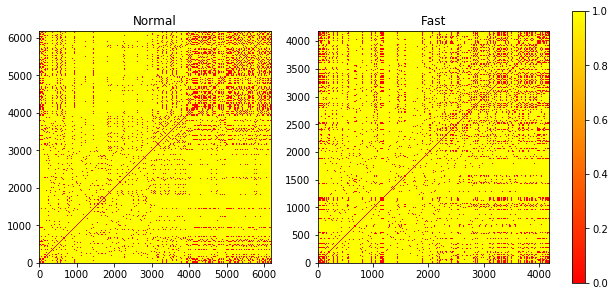

In [13]:
fig, arr = plt.subplots(1,2, figsize=(10,5), facecolor='white')
ax1 = arr[0].imshow(rec_mat_n, origin='lower', cmap='autumn')
arr[0].set_title('Normal')
ax2 = arr[1].imshow(rec_mat_f, origin='lower', cmap='autumn')
arr[1].set_title('Fast')
cax = fig.colorbar(ax2, ax=arr.ravel().tolist(), fraction=0.046, pad=0.04)